In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
tds = pd.read_csv('titanic.csv')

In [3]:
tds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tds.set_index('PassengerId', inplace = True)
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
tds.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Missing values heatmap')

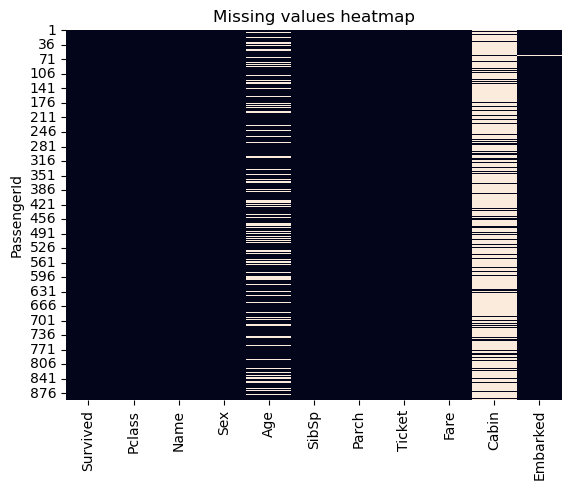

In [7]:
sns.heatmap(tds.isnull(), cbar = False).set_title("Missing values heatmap")

In [8]:
tds.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Text(0.5, 1.0, 'Percentage of people survived and Deceased')

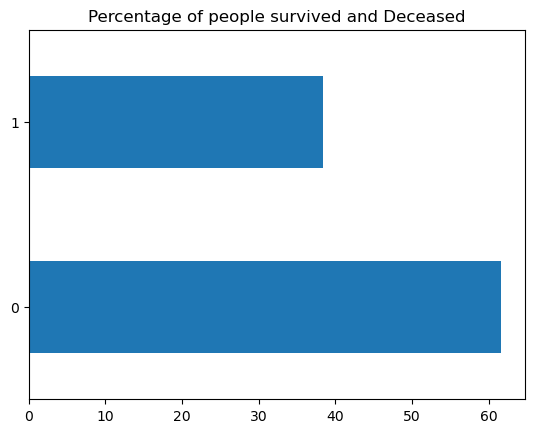

In [9]:
(tds.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Percentage of people survived and Deceased")

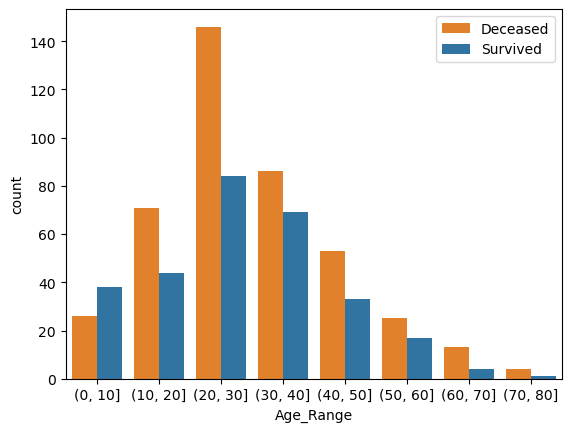

In [10]:
tds['Age_Range'] = pd.cut(tds.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = tds, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [11]:
tds['Family'] = tds.Parch + tds.SibSp + 1
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]",2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]",2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]",1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]",2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]",1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]",1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4


In [12]:
#tds['Fare_bin'] = pd.cut(tds['Fare'], bins=[0,7.91,14.45,31,120], labels=['low_fare','med_fare','highmed_fare','high_fare'])

In [13]:
#tds['Age_bin'] = pd.cut(tds['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

Text(0.5, 1.0, 'Survival based on embarking point')

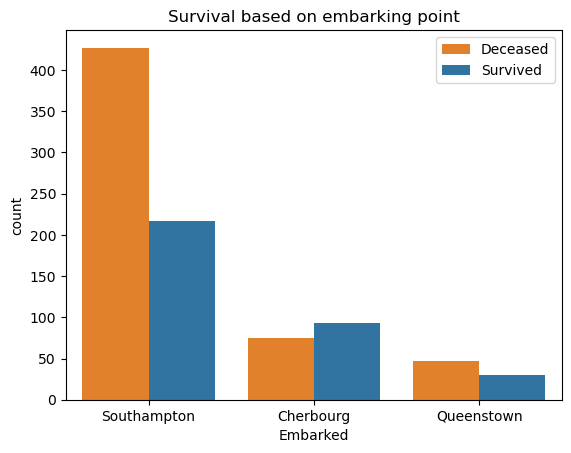

In [14]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = tds, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Survival based on embarking point")

In [15]:
#p = sns.countplot(x = "Embarked", hue = "Fare_bin", data = tds, palette=["C3", "C2", "C1", "C0"])
#p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
#p.legend(labels = ["low_fare", "med_fare", "highmed_fare", "high_fare"])
#p.set_title("Fare based on embarking point")

In [16]:
#p = sns.countplot(x = "Age_bin", hue = "Fare_bin", data = Age_temp, palette=["C3", "C2", "C1", "C0"])
#p.set_xticklabels(['Children','Teenage','Adult','Elder'])
#p.legend(labels = ["low_fare", "med_fare", "highmed_fare", "high_fare"])
#p.set_title("Fare based on Age")

In [17]:
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]",2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 40.0]",2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]",1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 40.0]",2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 40.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]",1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]",1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4


In [18]:
tds.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [19]:
tds['Title'] = tds.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

tds['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'the Countess'], 'Rare', inplace = True)
tds['Title'].replace(['Mlle'], ['Miss'], inplace = True)
tds['Title'].replace(['Ms'], ['Miss'], inplace = True)
tds['Title'].replace(['Mme'], ['Mrs'], inplace = True)

tds["Title"].replace(["Mr", "Rare", "Master", "Miss", "Mrs"], [0, 1, 2, 3, 4], inplace = True)

tds.Title.value_counts()

0    517
3    185
4    126
2     40
1     23
Name: Title, dtype: int64

In [20]:
tds = pd.get_dummies(tds, columns = ["Embarked"], prefix = "Embd", drop_first = True, dtype = int)
tds["Sex"].replace(["male", "female"], [0, 1], inplace = True)

In [21]:
guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = tds[(tds['Sex'] == i) & \
                              (tds['Pclass'] == j+1)]['Age'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        tds.loc[ (tds.Age.isnull()) & (tds.Sex == i) & (tds.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

tds['Age'] = tds['Age'].astype(int)
    


#tds['Age_bin'] = pd.cut(tds['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [22]:
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Range,Family,Title,Embd_Q,Embd_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,"(20.0, 30.0]",2,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,"(30.0, 40.0]",2,4,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,"(20.0, 30.0]",1,3,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,"(30.0, 40.0]",2,4,0,1
5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,"(30.0, 40.0]",1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,"(20.0, 30.0]",1,1,0,1
888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,"(10.0, 20.0]",1,3,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,W./C. 6607,23.4500,NaN,NaN,4,3,0,1


In [23]:
tds['AgeBand'] = pd.cut(tds['Age'], 5, labels = ["0", "1", "2", "3", "4"])
tds['AgeBand'] = tds['AgeBand'].astype(int)
tds['FareBand'] = pd.qcut(tds['Fare'], 5, labels = ["0", "1", "2", "3", "4"])
tds['FareBand'] = tds['FareBand'].astype(int)

In [24]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Name       891 non-null    object  
 3   Sex        891 non-null    int64   
 4   Age        891 non-null    int32   
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Ticket     891 non-null    object  
 8   Fare       891 non-null    float64 
 9   Cabin      204 non-null    object  
 10  Age_Range  714 non-null    category
 11  Family     891 non-null    int64   
 12  Title      891 non-null    int64   
 13  Embd_Q     891 non-null    int32   
 14  Embd_S     891 non-null    int32   
 15  AgeBand    891 non-null    int32   
 16  FareBand   891 non-null    int32   
dtypes: category(1), float64(1), int32(5), int64(7), object(3)
memory usage: 102.2+ KB


Text(0.5, 1.0, 'Heatmap after filling values')

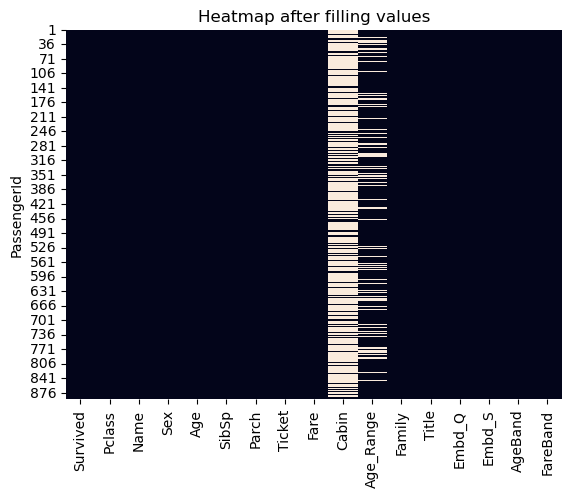

In [25]:
sns.heatmap(tds.isnull(), cbar = False).set_title("Heatmap after filling values")

In [26]:
tds['IsAlone'] = 0
tds.loc[tds['Family'] == 1, 'IsAlone'] = 1
tds["Pclass"].replace([1, 2, 3], [3, 2, 1], inplace = True)
tds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_Range,Family,Title,Embd_Q,Embd_S,AgeBand,FareBand,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,
1,0,1,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,"(20.0, 30.0]",2,0,0,1,1,0,0
2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,"(30.0, 40.0]",2,4,0,0,2,4,0
3,1,1,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,"(20.0, 30.0]",1,3,0,1,1,1,1
4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,"(30.0, 40.0]",2,4,0,1,2,4,0
5,0,1,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,"(30.0, 40.0]",1,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,"(20.0, 30.0]",1,1,0,1,1,2,1
888,1,3,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,"(10.0, 20.0]",1,3,0,1,1,3,1
889,0,1,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,W./C. 6607,23.4500,NaN,NaN,4,3,0,1,1,3,0


In [27]:
mn = tds.AgeBand.min()
mx = tds.AgeBand.max()
tds["AgeBand"] = (tds["AgeBand"] - mn)/(mx - mn)

mn = tds.FareBand.min()
mx = tds.FareBand.max()
tds["FareBand"] = (tds["FareBand"] - mn)/(mx - mn)

mn = tds.Pclass.min()
mx = tds.Pclass.max()
tds["Pclass"] = (tds["Pclass"] - mn)/(mx - mn)

mn = tds.Title.min()
mx = tds.Title.max()
tds["Title"] = (tds["Title"] - mn)/(mx - mn)

In [28]:
tds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Title,Embd_Q,Embd_S,AgeBand,FareBand,IsAlone
Survived,1.000000,0.338481,0.543351,-0.060291,-0.035322,0.081629,0.257307,0.016639,0.565716,0.003650,-0.155660,-0.037059,0.317783,-0.203367
Pclass,0.338481,1.000000,0.131900,0.414682,-0.083081,-0.018443,0.549500,-0.065997,0.137035,-0.221009,-0.081720,0.418829,0.705206,-0.135207
Sex,0.543351,0.131900,1.000000,-0.104584,0.114631,0.245489,0.182333,0.200988,0.944195,0.074115,-0.125722,-0.074935,0.244943,-0.303646
Age,-0.060291,0.414682,-0.104584,1.000000,-0.250248,-0.175708,0.123250,-0.258817,-0.136545,-0.095253,0.016382,0.945257,0.165544,0.175791
SibSp,-0.035322,-0.083081,0.114631,-0.250248,1.000000,0.414838,0.159651,0.890712,0.202135,-0.026354,0.070941,-0.228739,0.354974,-0.584471
Parch,0.081629,-0.018443,0.245489,-0.175708,0.414838,1.000000,0.216225,0.783111,0.330014,-0.081228,0.063036,-0.150458,0.351317,-0.583398
Fare,0.257307,0.549500,0.182333,0.123250,0.159651,0.216225,1.000000,0.217138,0.186031,-0.117216,-0.166603,0.146550,0.600883,-0.271832
Family,0.016639,-0.065997,0.200988,-0.258817,0.890712,0.783111,0.217138,1.000000,0.303022,-0.058592,0.079977,-0.231502,0.418125,-0.690922
Title,0.565716,0.137035,0.944195,-0.136545,0.202135,0.330014,0.186031,0.303022,1.000000,0.050633,-0.107910,-0.098927,0.304390,-0.411560
Embd_Q,0.003650,-0.221009,0.074115,-0.095253,-0.026354,-0.081228,-0.117216,-0.058592,0.050633,1.000000,-0.496624,-0.091631,-0.243154,0.086464


In [29]:
tds = tds.drop(["Age", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Fare", "Family", "Age_Range"], axis = 1)
tds

,Survived,Pclass,Sex,Title,Embd_Q,Embd_S,AgeBand,FareBand,IsAlone
PassengerId,,,,,,,,,
1,0,0.0,0,0.00,0,1,0.25,0.00,0
2,1,1.0,1,1.00,0,0,0.50,1.00,0
3,1,0.0,1,0.75,0,1,0.25,0.25,1
4,1,1.0,1,1.00,0,1,0.50,1.00,0
5,0,0.0,0,0.00,0,1,0.50,0.25,1
...,...,...,...,...,...,...,...,...,...
887,0,0.5,0,0.25,0,1,0.25,0.50,1
888,1,1.0,1,0.75,0,1,0.25,0.75,1
889,0,0.0,1,0.75,0,1,0.25,0.75,0


In [30]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    int64  
 3   Title     891 non-null    float64
 4   Embd_Q    891 non-null    int32  
 5   Embd_S    891 non-null    int32  
 6   AgeBand   891 non-null    float64
 7   FareBand  891 non-null    float64
 8   IsAlone   891 non-null    int64  
dtypes: float64(4), int32(2), int64(3)
memory usage: 62.6 KB


In [31]:
y = tds.iloc[:, 0]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [32]:
x = tds
x.drop(["Survived"], inplace = True, axis = 1)
x.insert(0, 'X0', 1)
x

,X0,Pclass,Sex,Title,Embd_Q,Embd_S,AgeBand,FareBand,IsAlone
PassengerId,,,,,,,,,
1,1,0.0,0,0.00,0,1,0.25,0.00,0
2,1,1.0,1,1.00,0,0,0.50,1.00,0
3,1,0.0,1,0.75,0,1,0.25,0.25,1
4,1,1.0,1,1.00,0,1,0.50,1.00,0
5,1,0.0,0,0.00,0,1,0.50,0.25,1
...,...,...,...,...,...,...,...,...,...
887,1,0.5,0,0.25,0,1,0.25,0.50,1
888,1,1.0,1,0.75,0,1,0.25,0.75,1
889,1,0.0,1,0.75,0,1,0.25,0.75,0


In [33]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

In [37]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = reg_strength * (np.sum(distances) / N)
    
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    
    if type(distance) == np.float64:
        distance = np.array([distance])
        X_batch = np.array([X_batch])
        Y_batch = np.array([Y_batch])
    
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw


def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights


def init():
    print("training started...")
    W = sgd(x_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print(f"weights are: {W}")

    # testing the model
    print("testing the model...")
    y_train_predicted = np.array([])
    for i in range(x_train.shape[0]):
        yp = np.sign(np.dot(x_train.to_numpy()[i], W))
        y_train_predicted = np.append(y_train_predicted, yp)

    print(f"accuracy on train dataset: {accuracy_score(y_train, y_train_predicted)}")
    #print(f"recall on train dataset: {recall_score(y_train, y_train_predicted)}")
    print(y_train_predicted)

def test():
    
    y_test_predicted = np.array([])
    for i in range(x_test.shape[0]):
        yp = np.sign(np.dot(x_test.to_numpy()[i], W))
        y_test_predicted = np.append(y_test_predicted, yp)

    print(f"accuracy on test dataset: {accuracy_score(y_test, y_test_predicted)}")
    print(f"recall on test dataset: {recall_score(y_test, y_test_predicted)}")

In [38]:
reg_strength = 10000
learning_rate = 0.001
init()

training started...
Epoch is: 1 and Cost is: 6310.532840009569
Epoch is: 2 and Cost is: 6253.896802316753
training finished.
weights are: [2.40818444 2.40818444 2.40818444 1.80613833 0.         2.40818444
 0.60204611 1.80613833 2.40818444]
testing the model...
accuracy on train dataset: 0.37640449438202245
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

PassengerId
332    0
734    0
383    0
705    0
814    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: Survived, Length: 712, dtype: int64

class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=1000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernal # for guassian

    def polynomial_kernal(self,X,Z):
        return (self.c + X.dot(Z.T))**self.degree #(c + X.y)^degree
        
    def gaussian_kernal(self, X,Z):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2) #e ^-(1/ σ2) ||X-y|| ^2
    
    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0]) 

        y_mul_kernal = np.outer(y, y) * self.kernel(X, X) # yi yj K(xi, xj)

        for i in range(self.epoches):
            gradient = self.ones - y_mul_kernal.dot(self.alpha) # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            self.alpha[self.alpha > self.C] = self.C # 0<α<C
            self.alpha[self.alpha < 0] = 0 # 0<α<C

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)
            
        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        
        # for intercept b, we will only consider α which are 0<α<C 
        b_list = []        
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(X, X[index])))

        self.b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }
            
    def predict(self, X):
        return np.sign(self.decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b


    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.train(x_train, y_train)
print("Accuracy: ", svm_dual1.score(x_train, y_train))
svm_dual1.plot('Non linear SVM plot for training set usign rbf(Gaussian)')